# Assignment 1 - Answers

This assignment should be completed in Python. If you like, you may create your own Jupyter Notebook file from scratch, but it is likely easier to modify this one.

Please do not be intimidated by the apparent length of this assignment (it is deceiving!). All required code is a single line. Questions that require identification and/or intepretation will not penalized for brevity of response: if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in class. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to tutorial. We will work with you through the issue.

If you like, you may collaborate with others in the class. If you choose to do so, please indicate with whom you have worked at the top of your PDF. Separate submissions are required.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Type `Boston?` to learn more about the dataset.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review the ‘help()’ file)



medv: median value of owner-occupied homes in $1000s.
dis: weighted mean of distances to five Boston employment centres.

_(ii)_ What concept ‘defines’ the plotted line?

Line of best fit, regessin line, minimiing distance between all pints, etc

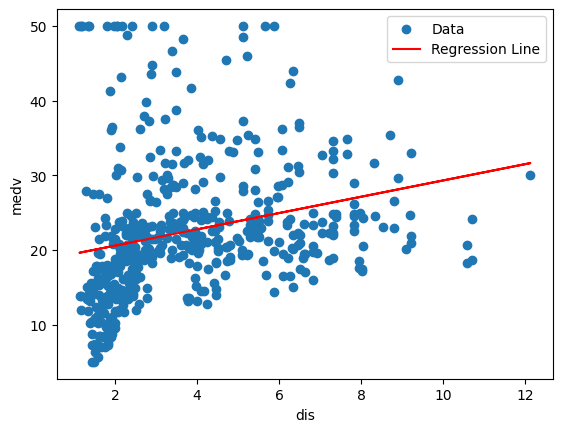

In [3]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?



Null ($H_0$): No relationship between distance to employment centre and value of home

Alternative ($H_1$): Some relationship between distance to employment centre and value of home

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X.

In [4]:
# Add your code here
y = Boston['medv']
x = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'dis': Boston['dis']})
model = sm.OLS(y,x )
result = model.fit()


Review your model output to answer the following questions (Hint: use the `summarize` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  

In [5]:
summarize(result)

,coef,std err,t,P>|t|
intercept,18.3901,0.817,22.499,0.0
dis,1.0916,0.188,5.795,0.0


$\beta_0$ = 18.3901

$\beta_1$ = 1.0916


_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  

std errr for:

$\beta_0$ = 0.817

$\beta_1$ = 0.188



_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
 

In [6]:
# Get confidence intervals for coefficients
conf_intervals = result.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
                   0          1
intercept  16.784179  19.995997
dis         0.721509   1.461717



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  

In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        17:35:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ explains just 6% variance and is very small. Find other predictors etc. Depending on context might be useful


_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value). 

Reject null value. F value is far from 1 and P value < 0.05

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `lm(y ~ x1 + x2)`).

In [8]:
# Add your code here
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'dis': Boston['dis'],
                  'rm': Boston['rm']})

model = sm.OLS(y, X)
result = model.fit()

summarize(result)


,coef,std err,t,P>|t|
intercept,-34.6361,2.621,-13.212,0.000
dis,0.4888,0.141,3.459,0.001
rm,8.8014,0.424,20.780,0.000


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

$H_0$: There is no relationship between distance to emplloyemnet centre and rooms, and value of home.
'dis' + 'rm' and 'medv'.

$H_A$: There is a relationship between distance to emplloyemnet centre and/or rooms, and value of home. (At least one predictor bears on response)

_(iii)_ Review the model output, using `summarize()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

Yes. The whole model is significant and p values for both coefficients are also significant.

_(iv)_ We can use the inbuilt `plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?



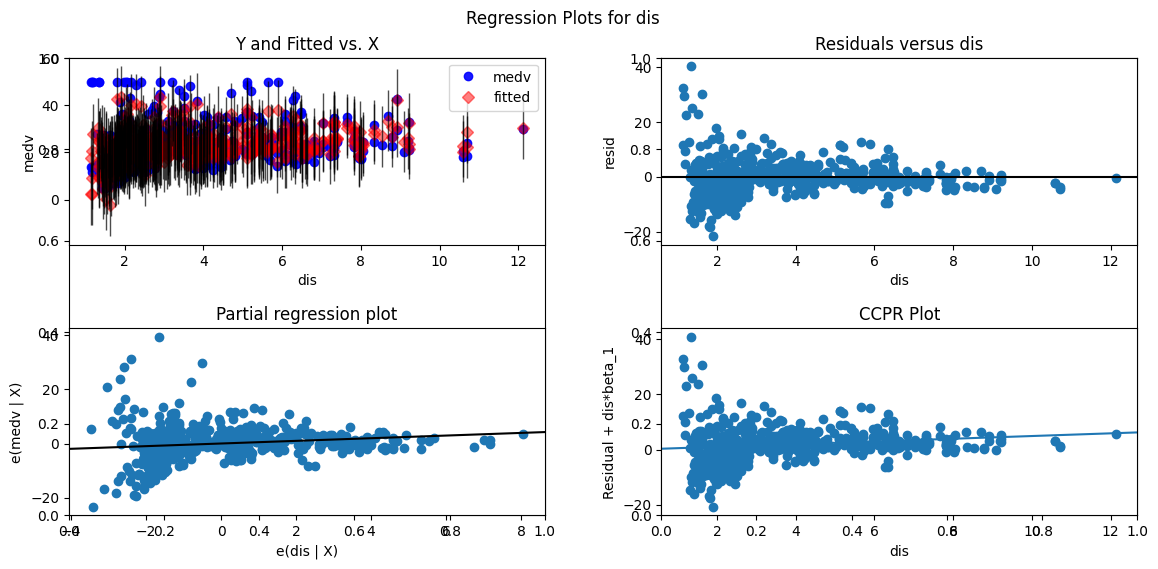

In [9]:
# Add your code here
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figure size as needed

# Plot the diagnostic plots using plot_regress_exog
# The second parameter 'dis' is the name of the independent variable to plot against
sm.graphics.plot_regress_exog(result, 'dis', fig=fig)  # Plotting Residuals vs. Fitted

# Show the plot
plt.show()

Outliers can shift line of best fit


_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: use the syntax `lm(y ~ x1 * x2)`). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [10]:
# Add your code here

model = sm.OLS.from_formula('y ~ dis * rm', data=Boston)
results = model.fit()
summarize(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           8.37e-79
Time:                        17:35:30   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2533      4.895     -3.116      0.0

YEs, as p value is significant, there is an interaction. Main effects of distance and rooms, remain significant. $R^2$ hasn't gone up a lot(49% to 51%). The effect of room number on house value depends on distance from employment center

### Question 3: Classification using KNN

We'll now use the `Caravan` dataset from the `ISLP` package. (You may type Caravan? in the console to review details of the dataset.) In this dataset, the response variable of interest is `Purchase`, which indicates if a given customer purchased a caravan insurance policy. We will simultaneously use all other variables in the dataset to predict the response variable.

In [11]:
# Load the "Caravan" dataset using the "load_data" function from the ISLP package
Caravan = load_data('Caravan')
Caravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


Before fitting any model, it is essential to understand our data. Answer the following questions about the `Caravan` dataset (Hint: use `print`):  
_(i)_ How many observations (rows) does the dataset contain?    
5822

_(ii)_ How many variables (columns) does the dataset contain?    
86

_(iii)_ What 'variable' type is the response variable `Purchase` (e.g., 'character', 'factor', 'numeric', etc)? What are the 'levels' of the variable?    
Factor, No, Yes

_(iv)_ How many predictor variables do we have (Hint: all variables other than `Purchase`)?  
85

Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the `scale` function, provided as follows:

In [12]:
print(Caravan)

      MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGODGE  MRELGE  ...  APERSONG  AG

In [13]:
# Select predictors (excluding the 86th column)
predictors = Caravan.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0  0.680906  -0.27258  0.406697 -1.216964  0.779405 -0.694311  0.217444   
1  0.992297  -0.27258 -0.859500 -1.216964  0.779405  0.302552 -0.365410   
2  0.992297  -0.27258 -0.859500 -1.216964  0.779405 -0.694311 -0.365410   
3 -1.187437  -0.27258  0.406697  0.010755 -0.970980  1.299414 -0.948264   
4  1.225840  -0.27258  1.672893 -1.216964  1.479559  0.302552 -0.365410   

     MGODOV    MGODGE    MRELGE  ...   ALEVEN  APERSONG   AGEZONG  AWAOREG  \
0 -0.068711 -0.161816  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   
1 -0.068711  0.464159 -0.096077  ... -0.20291 -0.073165 -0.081055 -0.05992   
2  0.914172  0.464159 -1.667319  ... -0.20291 -0.073165 -0.081055 -0.05992   
3  0.914172  0.464159 -0.619824  ... -0.20291 -0.073165 -0.081055 -0.05992   
4 -0.068711  0.464159  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   

     ABRAND   AZEILPL  APLEZIER   AFIETS   AINBOED  ABYSTAND  
0  0.764971 -0.02

_(v)_ Why is it important to standardize the predictor variables?  
KNN is based on euclidean dist. Variables with large ranges/magnitudes will influence distance calculation and standardization fixes it.

_(vi)_ Why did we elect not to standard our response variable `Purchase`?  
As it is a factor, it cannot be standardized

_(vii)_ A second essential step is to set a random seed. Do so below (Hint: use the `random.seed` function). Why is setting a seed important? Is the particular seed value important? Why or why not?


In [14]:
# Add your code here

np.random.seed(10)

Seed is to allow reproducability. Seed number does not matter, it just sets the number for the reproducability.

_(viii)_ A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. Extend the code to create a non-overlapping test set for the predictors and response variables.

In [15]:
# Create a random vector of True and False values
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = Caravan.loc[split, 'Purchase']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = Caravan.loc[~split, 'Purchase']


_(ix)_ We are finally set to fit the KNN model. In Python, we can use the `KNeighborsClassifier()` function. Fit the KNN with k=1. (You may review arguments to knn by typing `knn?`). 

In [16]:
# Add your code here
from sklearn.neighbors import KNeighborsClassifier
from ISLP import confusion_table

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(training_X, training_Y)
knn1_pred = knn1.predict(testing_X)
confusion_table(knn1_pred, testing_Y)


Truth,No,Yes
Predicted,,
No,1270,69
Yes,60,10


Using your fit model, answer the following questions:   
_(x)_ What is the prediction accuracy? (Hint: use the `mean` function, and compare your model to `testing_Y`)  


In [17]:
# prediction accuracy rate
(10+1270)/1409, np.mean(knn1_pred == testing_Y)


(0.9084457061745919, 0.9084457061745919)

_(xi)_ What is the predictor error (Hint: as error is the inverse of accuracy, use the 'not' operator, `!`)  

In [18]:
# prediction error rate
(129)/1409, np.mean(knn1_pred != testing_Y)

(0.09155429382540808, 0.09155429382540808)

_(xii)_ How does this prediction error/accuracy compare to what could be achieved via random guesses? To answer this, consider the percent of customers in the `Caravan` dataset who actually purchase insurance, computed below:

In [19]:
# Calculate the percentage of customers who purchase insurance
percentage_purchase = (Caravan['Purchase'].eq('Yes').sum() / Caravan['Purchase'].eq('No').sum()) * 100

print(percentage_purchase)

6.357325538911216


THe model does not perform well. Could just be guessing 'No' everytime and only have this much error

_(xiii)_ Fit a second KNN model, with $K=3$. Does this model perform better (i.e., have higher accuracy, compared to a random guess)?

In [20]:
#fit knn, with k=3
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(training_X, training_Y)
knn2_pred = knn2.predict(testing_X)
confusion_table(knn2_pred, testing_Y)
np.mean(knn2_pred == testing_Y)

0.9261887863733144

Better but still not better than guessing no everytime.